**This is a churn Notebook and a Power BI dashboard to get insights on churning clients.**

In [3]:
!pip install pandas-profiling==2.8.0


     |████████████████████████████████| 266kB 5.1MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 1.1MB 8.9MB/s 
     |████████████████████████████████| 3.1MB 19.0MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
     |████████████████████████████████| 296kB 24.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=8d443473e8b95f1195c4ac4cd0073a0e601b157020bdbc615f385a3d5c24fdbc
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=0825fbbfd7b52f8ef40dbb4e458fd80302f16f7d6493d40b5193a755607b61bd
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [5]:
from pandas_profiling import ProfileReport

In [6]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/j5arxpx2g2sglprhicmbdsa4jaoimn')

In [7]:
profile =ProfileReport(df,title ="Churn profile report", explorative =True)

In [8]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:385: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()

customerID  tenure PhoneService  ... MonthlyCharges TotalCharges Churn
0  7590-VHVEG       1           No  ...          29.85        29.85    No
1  5575-GNVDE      34          Yes  ...          56.95       1889.5    No
2  3668-QPYBK       2          Yes  ...          53.85       108.15   Yes
3  7795-CFOCW      45           No  ...          42.30      1840.75    No
4  9237-HQITU       2          Yes  ...          70.70       151.65   Yes

[5 rows x 9 columns]

In [10]:
df.tail()

customerID  tenure PhoneService  ... MonthlyCharges TotalCharges Churn
7038  6840-RESVB      24          Yes  ...          84.80       1990.5    No
7039  2234-XADUH      72          Yes  ...         103.20       7362.9    No
7040  4801-JZAZL      11           No  ...          29.60       346.45    No
7041  8361-LTMKD       4          Yes  ...          74.40        306.6   Yes
7042  3186-AJIEK      66          Yes  ...         105.65       6844.5    No

[5 rows x 9 columns]

In [11]:
df.shape

(7043, 9)

In [12]:
df.describe()

tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

In [13]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


Missing values

In [16]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
#check for duplications

In [18]:
df.duplicated().sum()

0

In [19]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
#Calculate % of the target variable
count_churn = len(df[df['Churn']=="Yes"])
count_non_churn = len(df[df['Churn']=="No"])
pct_of_non_churn = count_non_churn/(count_non_churn +count_churn)
print("percentage of non churn is", round(pct_of_non_churn*100,2),"%")
pct_of_churn = count_churn/(count_non_churn +count_churn)
print("percentage of churn is", round(pct_of_churn*100,2),"%")

percentage of non churn is 73.46 %
percentage of churn is 26.54 %


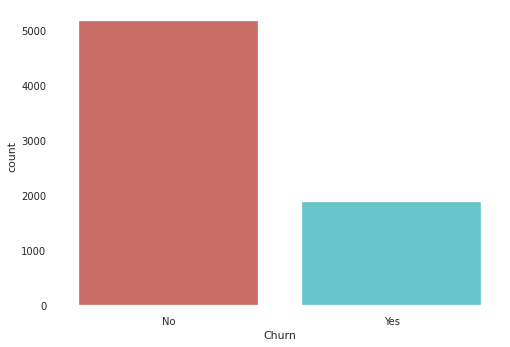

In [21]:
sns.countplot(x='Churn',data=df, palette='hls')
plt.show()

In [22]:
df.groupby('Churn').mean()

tenure  MonthlyCharges
Churn                           
No     37.569965       61.265124
Yes    17.979133       74.441332

In [23]:
print(df['PhoneService'].unique())
print(df['PaperlessBilling'].unique())
print(df['PaymentMethod'].unique())
print(df['Contract'].unique())

['No' 'Yes']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Month-to-month' 'One year' 'Two year']


Univariate

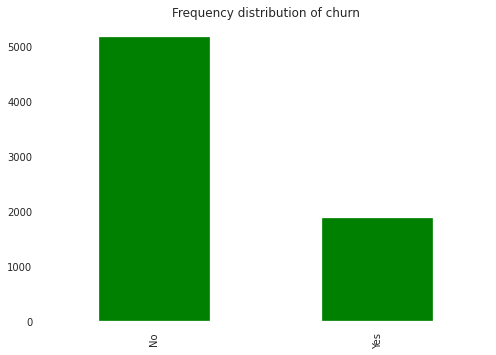

In [24]:
df['Churn'].value_counts(). plot.bar(title = 'Frequency distribution of churn', color = 'green')

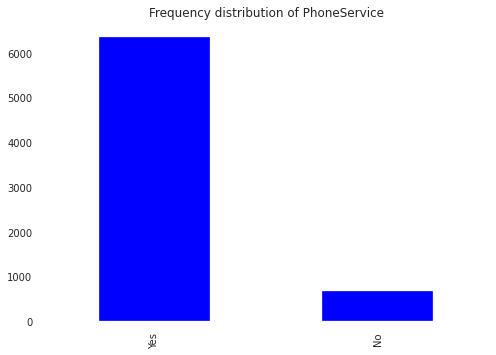

In [25]:
df['PhoneService'].value_counts(). plot.bar(title = 'Frequency distribution of PhoneService', color = 'blue')

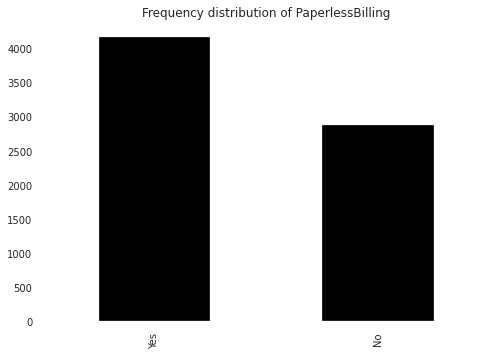

In [26]:
df['PaperlessBilling'].value_counts(). plot.bar(title = 'Frequency distribution of PaperlessBilling', color = 'black')

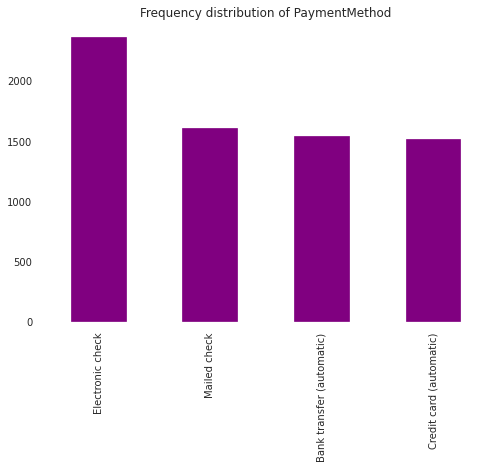

In [27]:
df['PaymentMethod'].value_counts(). plot.bar(title = 'Frequency distribution of PaymentMethod', color = 'Purple')

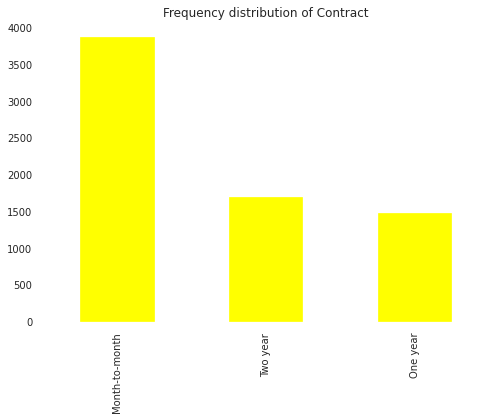

In [28]:
df['Contract'].value_counts(). plot.bar(title = 'Frequency distribution of Contract', color = 'Yellow')

Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

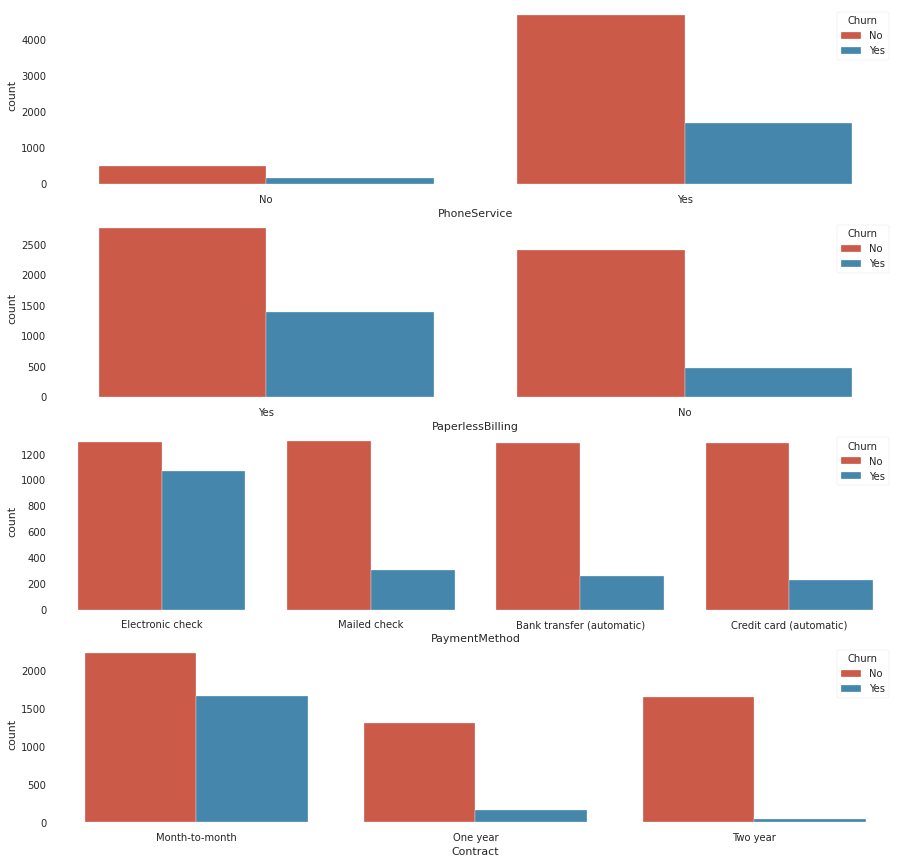

In [29]:
# Define how the axes of our plots
f, axes = plt.subplots(4, 1, figsize=[15, 15])

sns.countplot('PhoneService', hue= 'Churn', data=df, ax=axes[0])
sns.countplot('PaperlessBilling', hue= 'Churn', data=df, ax=axes[1])
sns.countplot('PaymentMethod', hue= 'Churn', data=df, ax=axes[2])
sns.countplot('Contract', hue= 'Churn', data=df, ax=axes[3])


In [30]:
#change categorical variables to into numerical variables.

print(df['Churn'].unique())
df['Churn'] = df['Churn'].apply({'No':0, 'Yes':1}.get)
df['PhoneService'] = df['PhoneService'].apply({'No':0, 'Yes':1}.get)
df['PaperlessBilling'] = df['PaperlessBilling'].apply({'No':0, 'Yes':1}.get)
df['PaymentMethod'] = df['PaymentMethod'].apply({'Electronic check':0, 'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3 }.get)
df['Contract'] = df['Contract'].apply({'Month-to-month':0, 'One year':1,'Two year':2}.get)
df.head()

['No' 'Yes']


customerID  tenure  PhoneService  ...  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG       1             0  ...           29.85         29.85      0
1  5575-GNVDE      34             1  ...           56.95        1889.5      0
2  3668-QPYBK       2             1  ...           53.85        108.15      1
3  7795-CFOCW      45             0  ...           42.30       1840.75      0
4  9237-HQITU       2             1  ...           70.70        151.65      1

[5 rows x 9 columns]

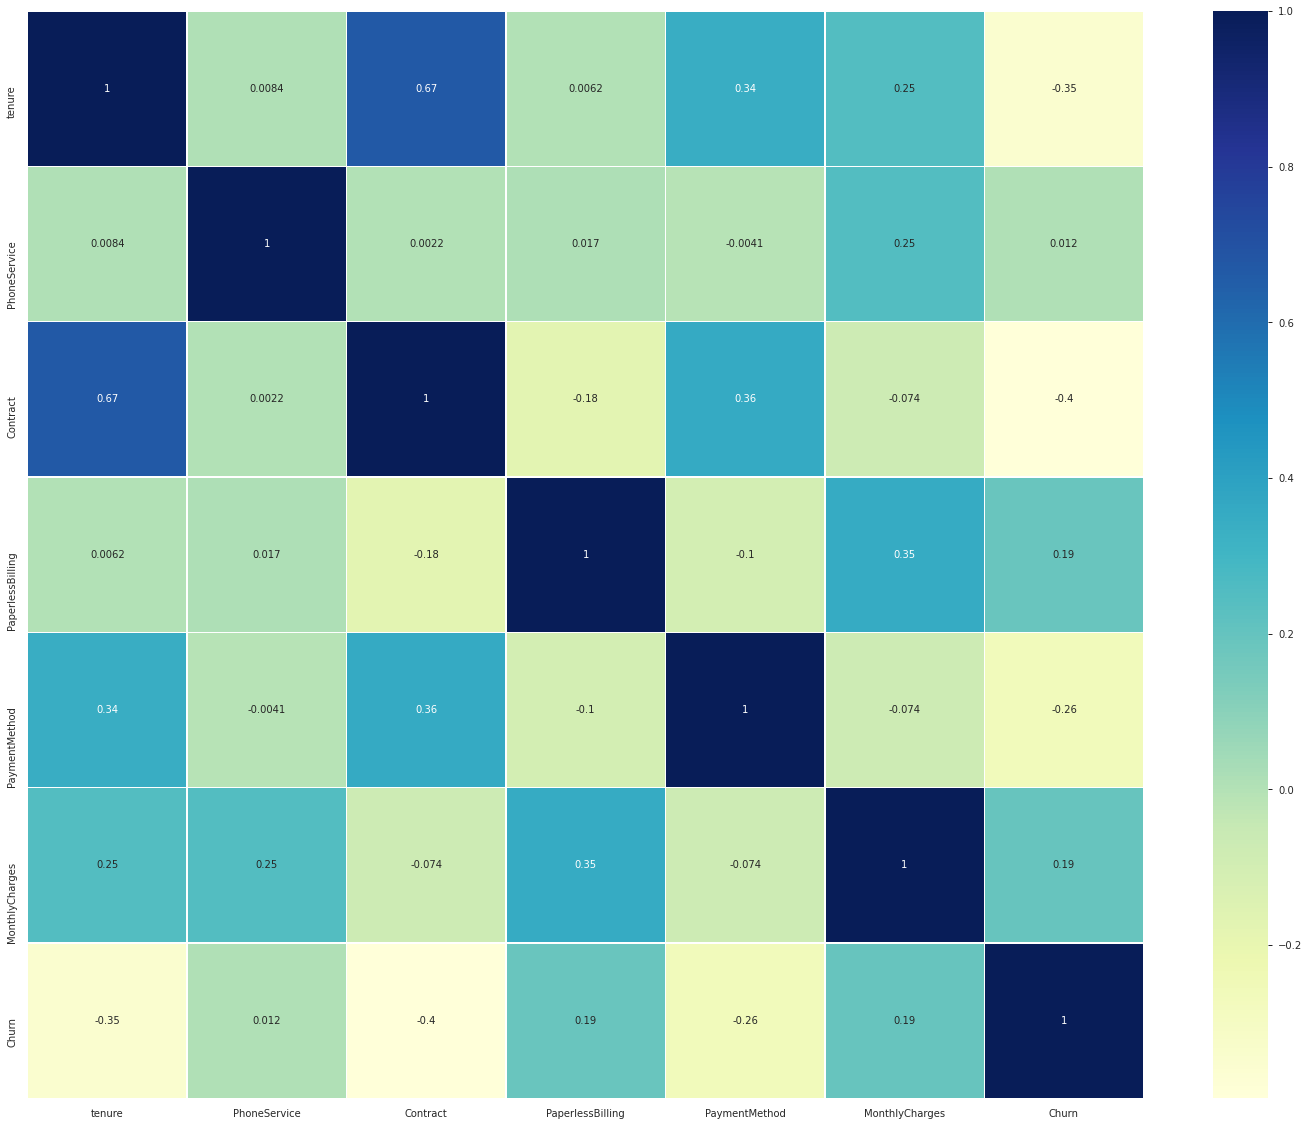

In [31]:
# Create a correlation matrix
correlation = df.corr()
correlation


fig, ax = plt.subplots(figsize=(25, 20)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax, cmap="YlGnBu")

In [39]:
pip install powerbiclient

In [ ]:
from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication
device_auth = DeviceCodeLoginAuthentication()

In [41]:
access_token = device_auth.get_access_token()

In [42]:
#group_id = "0f515867-d5a9-4f80-ab63-25c2ed7be63b"
#report_id = "60171249-75d3-4430-a875-576516249ebc"

In [46]:
report_id = "5b413f54-7922-4691-a9c7-9b7b7bde1a11"
group_id = "bf7bf614-8c97-4b6a-ac8a-324542e58f6b"

In [52]:
report = Report(group_id =group_id,report_id=report_id, auth=device_auth)

In [57]:
report


Report()